# Study of the Phonetic Processes in Russian Loanwords

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import html
import urllib
import time
import re
import textdistance
import os

### Part 1. Analysis of Chinese Loanword Dictionary (WaiLaiCi CiDian)

The following functions and analyses are primarily based pandas+regexp, so that a user can type necessary symbols (set of symbols) and get a subset of the dataset. The functions vary in what column(s) the sorting is done on, and on whether symbols or sets of them are used.

In [2]:
df_phon = pd.read_csv('..\..\data\wlc_cd.csv', delimiter=',', index_col='id')
df_phon.head()

,word,pinyin_final,origin,lang,problematic,rus_transcription
id,,,,,,
0,阿尔申,āěrshén,аршин,NaN,NaN,аршЫн
1,阿尔西非(合金),āěrxǐfēi,альсифер,NaN,NaN,Ал’с’ьф’ьр
2,阿法林,āfǎlín,афалина,NaN,NaN,афал’Инъ
3,阿留米特,āliúmǐtè,алюмит,NaN,?,ал’ум’Ит
4,阿依尔,āyi'ěr,аил,NaN,NaN,аИл


In [3]:
df_phon.head()

,word,pinyin_final,origin,lang,problematic,rus_transcription
id,,,,,,
0,阿尔申,āěrshén,аршин,NaN,NaN,аршЫн
1,阿尔西非(合金),āěrxǐfēi,альсифер,NaN,NaN,Ал’с’ьф’ьр
2,阿法林,āfǎlín,афалина,NaN,NaN,афал’Инъ
3,阿留米特,āliúmǐtè,алюмит,NaN,?,ал’ум’Ит
4,阿依尔,āyi'ěr,аил,NaN,NaN,аИл


In [4]:
df_phon = df_phon.drop(columns=['lang', 'problematic'])

### Simplex codas, word-final positions
####  Pt1. obstruents (plosive, affricates, fricatives)

In [22]:
plosive_codas = '([бпгк]’?|[дт])'
affricate_codas = '([чдт]’|ц)'
#dental_hard_codas = '[дт]'
#dental_soft_codas = '[дт]’'
fricative_codas = '[вфзсжшх]’?'
eos = '$'
vowels = '[аоуыэиъьАОУЫЭИi]'


In [12]:
# the function takes codas grouped by articulation type and makes subset based on Russian transcription

def subset_final_coda_type(nucleus, coda_type, eos):
    end = nucleus + coda_type + eos
    subset = df_phon[df_phon['rus_transcription'].str.contains(end)]
    return subset

In [28]:
subset_final_coda_type(vowels, affricate_codas, eos)

,word,pinyin_final,origin,rus_transcription
id,,,,
28,贝尔科维次,bèi'ěrkēwéicì,берковец,б’Эркъв’ьц
37,壁里砌,bìlìqì,печь,п’эч’
43,波舍杭,bōshěháng,пошехонец,пъшыхОн’ьц
115,哈契奇(板),hāqìqī(bǎn),пхачич,пхач’Ич’
255,切尔逢涅茨,qiē'ěrféngniècí,червонец,ч’ирвОн’ьц
268,赛切,sàiqiè,сечь,с’Эч’
332,托尔班(琴),tuō'ěrbān(qín),торбач,тОрбъч’
358,乌维万涅茨(舞),wūféiwànniècí(wǔ),увиванец,ув’ивАн’ьц
381,伊凡诺维基,yīfánnuòwéijī,Иванович,ивАнъв’ьч’


#### Pt2. Nasals and liquids

In [40]:
subset_final_coda_type(vowels, 'i', eos)

,word,pinyin_final,origin,rus_transcription
id,,,,
30,贝伊勒贝伊,bèiyilèbèiyi,бейлербей,б’эй’л’ирб’Эi
39,别伊,biéyi,бей,б’Эi
144,卡尔那号,kǎ'érnàhào,карнай,карнАi
175,库莱(笛),kùlái(dí),курай,курАi
382,伊斯拉梅(舞),yīsīlāméi(wǔ),исламей,ислам’Эi


In [10]:
codas = '[аоуыэи]'
coda_positions = '([йцкншщзхфвпрлджчсмтб]|$)'

In [318]:
hard_codas = '[аоуыэ]'
coda_position = '[йцкншщзхъфвпрлджчсмтб$]'
soft_codas = '[яёиюе]'
yotated = '[яёюе]'
yot_position = '[ьаоуыэяёюие]'
all_codas = '[яёюеаоуыэ]'

In [5]:
plosives = '[бпгк]'
plosives_soft = '[]'
fricatives = '[вфзсшжх]'
affricates = '[цч дж]'
semi_affricates = '[тд]'
nasals = '[мн]'
liquids = '[рл]'
glides = 'й'

In [6]:
# the function has the same purpose as the previous one, but allows to regulate soft|hard opposition

def subsetting(onset, coda, soft=False):
    string = onset+coda
    if soft == True:
        string = onset + '’' + coda
    else:
        string = onset + coda
    subset = df_phon[df_phon['rus_transcription'].str.contains(string)]
    return subset

In [92]:
subsetting('л', coda_positions, soft=True)

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  import sys


,word,pinyin_final,origin,lang,Unnamed: 6,rus_transcription
id,,,,,,
1,阿尔西非合金,āěrxǐfēi,альсифер,NaN,NaN,ал’с’иф’эр
15,奥克索尔油,àokèsuǒ'ěr(yóu),оксоль,NaN,NaN,аксол’
33,比奥熙诺尔,bǐ'àoxīnuò'ěr,биохиноль,NaN,NaN,б’иох’инол’
51,布尔什维克,bù'ěrshíwéikè,большевик,NaN,NaN,бал’шыв’ик
73,杜阿登诺尔布,dù'ādēngnuò'ěr(bù),туальденор,NaN,NaN,туал’дынор
91,伏尔泰椅,fú'ěrtài(yǐ),вольтеровское кресло,NaN,NaN,вал’тэр
103,格兰尼托皮,gélánnítuōpí,гранитоль,NaN,NaN,гран’итол’
107,格丝里,gésīlǐ,гесль,NaN,NaN,г’эсл’
132,吉协力,jíxiélì,кисель,NaN,NaN,к’ис’эл’


### Part 2. Analysis of Wikidata+BKRS subset (proper names with explicit pinyin transliterations)

In [5]:
df_bkrs = pd.read_csv('..\..\data\data_translit_cleared.csv', delimiter=';')
df_bkrs['translit'] = df_bkrs['translit'].replace(to_replace=r' ', value=r'', regex=True)
df_bkrs['translit'] = df_bkrs['translit'].replace(to_replace=r'’', value=r'', regex=True)
df_bkrs = df_bkrs.drop_duplicates()
df_bkrs['label_ru'] = df_bkrs['label_ru'].str.lower()
df_bkrs.head(20)

,label_zh,label_ru,translit
0,奥涅加,онега,àonièjiā
1,奥特拉德诺耶,отрадное,àotèlādénuòyē
2,贝加尔,байкал,bèijiāěr
3,拉多加,ладога,lāduōjiā
4,伏尔加,волга,fúěrjiā
5,普斯科夫,псков-,pǔsīkēfū
6,列佩利,лепель-,lièpèilì
7,哈桑,хасан,hāsāng
8,谢利格尔,селигер,xièlìgéěr
9,拉马,лама,lāmǎ


In [31]:
plosive_hard = '[бпгкдт]'
plosive_soft = '[бпгк]ь'
affricate_soft = '(ч|[дт]ь)'
affricate_hard = 'ц'
fricative_hard = '[вфзсжшх]'
fricative_soft = '(щь?|[вфзсжшх]ь)'
#dental_hard_codas = '[дт]'
#dental_soft_codas = '[дт]’'
#fricative_codas = '[вфзсжшх]'
eos = '( |-|$)'
vowels = '[аоуыэияёюеАОУЫЭИЯЁЮЕ]'


In [10]:
# the function takes codas grouped by articulation type and makes subset based on Russian transcription

def bkrs_subset_final_coda_type(nucleus, coda_type, eos):
    
    end = nucleus + coda_type + eos

    subset = df_bkrs[df_bkrs['label_ru'].str.contains(end)]
    return subset

In [57]:
bkrs_subset_final_coda_type(vowels, 'й', eos)[90:]

,label_zh,label_ru,translit
1289,伊佐比利内,изобильный,yīzuǒbǐlìnèi
1290,伊希姆拜,ишимбай,yīxīmǔbài
1298,克德罗维,кедровый,kèdéluówéi
1300,皮奥涅尔斯基,пионерский,píàonièěrsījī
1318,斯洛博茨科伊,слободской,sīluòbócíkēyī
1333,旧奥斯科尔,старый оскол,jiùàosīkēěr
1334,斯帕斯克达利尼,спасск дальний,sīpàsīkèdálìní
1335,斯帕斯克-梁赞斯基,спасск рязанский,sīpàsīkèliángzànsījī
1336,索先斯基,сосенский,suǒxiānsījī
1342,苏维埃茨基,советский,sūwéiāicíjī


# CC clusters

## Word-initial position

The main strategies of CC adaptation by [Miao 2005]:
1. CCV > CVCV
2. CCV > C2V
3. CCV > C1V
4. CCV > CGV (G = {w, y})

In [6]:
beginning = '(^| )'
cluster = '[йцкнгшщзхждлрпвфчсмтб][ьъ]?([йцкнгшщзхждлрпвфчсмтб]|[ьъ])'
vowels = '[аоуыэияёюе]'


In [1]:
# the function makes subset of all cluster occurrences based on Russian orthography (not phonetics)
# This function works for BKRS data

def subset_CC_onset(beginning, cluster, vowel):
    
    string = beginning + cluster + vowel
    #end = nucleus + coda_type + eos

    subset = df_bkrs[df_bkrs['label_ru'].str.contains(string)]
    return subset

In [70]:
subset_CC_onset(beginning, 'д[жз]', vowels).shape

(10, 3)

In [80]:
beginning = '^'
cluster = '[йцкнгшщзхждлрпвфчсмтб]’?[йцкнгшщзхждлрпвфчсмтб]’?'
vowels = '[аоуыэиАОУЫЭИi]'

# the function makes subset of all cluster occurrences based on Russian phonetics
# This function works for Dictionary data
def subset_CC_onset_wlc(beginning, cluster, vowel):
    
    string = beginning + cluster + vowel
    #end = nucleus + coda_type + eos

    subset = df_phon[df_phon['rus_transcription'].str.contains(string)]
    return subset

In [81]:
subset_CC_onset_wlc(beginning, cluster, vowels)

,word,pinyin_final,origin,rus_transcription
id,,,,
46,泊列考斯(羊),bólièkǎosī(yáng),прекос,пр’икОс
53,布拉吉,bùlājí,платье,плАт’iь
57,查奴里(琴),chánúlǐ(qín),чванури,ч’ванУр’ь
84,费兰德(兔),fèilándé(tù),фландр,флАндр
104,格林斯本,gélínsǐběn,гринсбон,гр’инзбОн
105,格鲁乌,gélǔwū,ГРУ,грУ
106,格罗什,géluóshí,грош,грОш
115,哈契奇(板),hāqìqī(bǎn),пхачич,пхач’Ич’
117,赫罗姆卡,hèluómǔkǎ,хромка,хрОмкъ


## CC word-final codas

In [8]:
eow = '(-| |$)'
cluster = '[йцкнгшщзхждлрпвфчсмтб][ьъ]?[йцкнгшщзхждлрпвфчсмтб][ьъ]?'
vowels = '[аоуыэияёюе]'

#the same function but for word final clusters for BKRS (search by Russian orthography)
def subset_CC_coda(beginning, cluster, eow):
    
    string = beginning + cluster + eow
    #end = nucleus + coda_type + eos

    subset = df_bkrs[df_bkrs['label_ru'].str.contains(string)]
    return subset

In [11]:
subset_CC_coda(vowels, cluster, eow)[31:]

,label_zh,label_ru,translit
907,罗斯拉夫尔,рославль,luósīlāfūěr
975,乌斯季杰古塔,усть джегута,wūsījìjiégǔtǎ
976,乌斯季伊利姆斯克,усть илимск,wūsījìyīlìmǔsīkè
983,奥伦堡,оренбург,àolúnbǎo
1017,乌斯季-卡塔夫,усть катав,wūsījìkǎtǎfū
1019,乌斯季-拉宾斯克,усть лабинск,wūsījìlābīnsīkè
1034,新库兹涅茨克,новокузнецк,xīnkùzīniècíkè
1040,霍尔姆,холм,huòěrmǔ
1051,安德,анд-,āndé
1116,阿斯别斯特,асбест,āsībiésītè


In [12]:
eow = '$'
cluster = '[iйцкнгшщзхждлрпвфчсмтб]’?[йцкнгшщзхждлрпвфчсмтб]’?'
vowels = '[аоуыэиАОУЫЭИi]'

#the same function but for word final clusters for Dictionary (search by Russian phonetics)

def subset_CC_coda_wlc(beginning, cluster, eow):
    
    string = beginning + cluster + eow
    #end = nucleus + coda_type + eos

    subset = df_phon[df_phon['rus_transcription'].str.contains(string)]
    return subset

In [13]:
subset_CC_coda_wlc(vowels, cluster, eow)

,word,pinyin_final,origin,rus_transcription
id,,,,
31,焙结纳克斯(胶),bēijiénàkèsī(jiāo),пертинакс,п’ьрт’инАкс
32,崩得,bēngdé,бунд,бУнт
47,博尔食(汤),bó'ěrshí(tāng),борщ,бОрш’
48,博克式(头),bókèshì(tóu),бокс( прическа),бОкс
59,禅格(琴),chángé(qín),ченг,ч’Энк
82,方特,fāngtè,фант,фАнт
85,分特,fēntè,фунт,фУнт
107,格丝里,gésīlǐ,гесль,г’Эсл’
122,霍尔特(狗),huǒ'ěrtè(gǒu),хорт,хОрт


In [122]:
plosive_hard = '[бпгкдт]ь?'
plosive_soft = '[бпгк]ь'
affricate_soft = '(ч|[дт]ь?)'
affricate_hard = 'ц'
fricative_hard = '[вфзсжшх]ь?'
fricative_soft = '(щь?|[вфзсжшх]ь)'
#dental_hard_codas = '[дт]'
#dental_soft_codas = '[дт]’'
#fricative_codas = '[вфзсжшх]'
eos = '( |-|$)'
vowels = '[аоуыэияёюеАОУЫЭИЯЁЮЕ]'

eow = '(-| |$)'
consonants = '[йцкнгшщзхждлрпвфчсмтб][ьъ]?'
vowels = '[аоуыэияёюе]'



In [123]:
# the function takes into account the articulation type of each consonant (firs, second variables).
# surround variable is for vowel context, eofs is for beginning|end of string sybmols.
# beginning is whether the cluster is in the beginning or not. df, col_name states the dataset and the column name.

def cc_pres_del(first, second, surround, eofs, df, col_name, beginning=True):
    if beginning:
        string = eofs + first + second + surround
    
    else:
        string = surround + first + second + eofs

    subset = df[df[col_name].str.contains(string)]
    return subset    
    

In [171]:
cc_pres_del(consonants, 'й', vowels, eow, df_bkrs, 'label_ru', beginning=False)

,label_zh,label_ru,translit
313,新奥斯科尔,новыйй оскол,xīnàosīkēěr


In [224]:
cluster = '[йцкнгшщзхждлрпвфчсмтб]’?'
vowels = '[аоуыэиАОУЫЭИi]'
bow = '(^| )'
eow = '( |$)'
plosives = '[бпгкдт]'
plos_soft = '[бпгк]’'
fricatives = '[вфзсшжх]’'
affricates = '([дт]’|ч’)'
affr_hard = 'ц'


In [250]:
cc_pres_del(cluster, 'i', vowels, eow, df_phon, 'rus_transcription', beginning=False)#.shape

,word,pinyin_final,origin,rus_transcription
id,,,,


## 3 and more consonants

In [14]:
#for wlc_cd
cluster = '([йцкнгшщзхждлрпвфчсмтб]’?){4}'
vowels = '[аоуыэиАОУЫЭИi]'
bow = '(^| )'
eow = '( |$)'



In [18]:
# for bkrs
cluster = '([йцкнгшщзхждлрпвфчсмтб](ь|ъ)?){3}'
vowels = '[аоуыэияёюе]'
bow = '(^| )'
eow = '( |$|-)'

In [16]:
# the design is the same as for the previous function.

def ccc_pres_del(cluster, vowels, br, df, col_name, beginning=True):

    if beginning:
        string = br + cluster + vowels
    
    else:
        string = vowels + cluster + br

    subset = df[df[col_name].str.contains(string)]
    return subset   

In [19]:
ccc_pres_del(cluster, vowels, eow, df_bkrs, 'label_ru', beginning=False)

,label_zh,label_ru,translit
184,沙赫乔尔斯克,шахтёрск,shāhèqiáoěrsīkè
197,伊尔库茨克,иркутск-,yīěrkùcìkè
201,亚历山德罗夫斯克,александровск,yàlìshāndéluófūsīkè
217,尼科利斯克,никольск-,níkēlìsīkè
219,捷尔任斯克,дзержинск-,jiéěrrènsīkè
...,...,...,...
1405,博布鲁伊斯克,бобруйск,bóbùlǔyīsīkè
1414,亚美尼亚斯克,армянск,yàměiníyàsīkè
1431,后贝加尔斯克,забайкальск,hòubèijiāěrsīkè
1443,斯维亚日斯克,свияжск,sīwéiyàrìsīkè


# Part 2. Vowels



Note that:
1. many of the items that are marked "Russian" in Wailaici Cidian are actually loans in Russian itself (from Georgian, Turkic languages etc.). Sometimes it is impossible to understand the stress in such words. All these words were marked "problematic" and are removed from this part of the analysis.
2. for a very big part of the Russian proper nouns (Wikipedia+BKRS dataset), we could not find the explicit stress. Thus, this dataset is no analysed in this part.

In [ ]:
df_phon_clear = df_phon_clear.drop(['lang', 'problematic'], axis=1) #removing the "problematic" cases

In [5]:
df_phon_clear.head()

,word,pinyin_final,origin,rus_transcription
id,,,,
0,阿尔申,āěrshén,аршин,аршЫн
1,阿尔西非(合金),āěrxǐfēi,альсифер,Ал’с’ьф’ьр
2,阿法林,āfǎlín,афалина,афал’Инъ
4,阿依尔,āyi'ěr,аил,аИл
5,阿札林,āzhálín,азарин,азар’Ин


In [6]:
df_phon.head()

,word,pinyin_final,origin,rus_transcription
id,,,,
0,阿尔申,āěrshén,аршин,аршЫн
1,阿尔西非(合金),āěrxǐfēi,альсифер,Ал’с’ьф’ьр
2,阿法林,āfǎlín,афалина,афал’Инъ
3,阿留米特,āliúmǐtè,алюмит,ал’ум’Ит
4,阿依尔,āyi'ěr,аил,аИл


making subset the same way as earlier.  
the function is both used for analysing the vowel SOUNDS and the vowel LETTERS (we just changed the "rus_transcription" and "origin" col names)


In [35]:
def subset_vowel(vowel, df, col):
    
    #string = beginning + cluster + eow
    #end = nucleus + coda_type + eos

    subset = df[df[col].str.contains(vowel)]
    return subset

In [67]:
subset_vowel('[оО]', df_phon, 'rus_transcription')[:50]

,word,pinyin_final,origin,rus_transcription
id,,,,
6,艾费勃,àifèibó,офеб(ы),оф’Эп
7,艾米利通,àimǐlìtōng,эмиритон,им’ьр’итОн
11,爱特罗尔,àitèluó'ěr,этрол,итрОл
14,奥白列克(舞),àobáilièkè(wǔ),оберек,об’Эр’ьк
15,奥克索尔(油),àokèsuǒ'ěr(yóu),оксоль,аксОл’
17,奥潘诺尔,àopānnuò'ěr,оппанол,апанОл
19,奥苏奥海(舞),àosūàohǎi(wǔ),осуохай,асуохАй’
33,比奥熙诺尔,bǐ'àoxīnuò'ěr,биохиноль,б’иах’инОл’
40,波尔特阔维契(车刀),bō'ěrtèkuòwéiqì(chedao),(резец )Бортковича,барткОв’ьч’


In [87]:
subset_vowel('(о|О)', df_phon_clear, 'origin')[100:]

,word,pinyin_final,origin,rus_transcription
id,,,,
258,若克(舞),ruòkè(wǔ),жок,жОк
259,萨夫火支,sàfūhuǒzhī,совхоз,сафхОс
260,萨科利津,sàkēlìjīn,сарколизин,саркъл’из’Ин
263,萨玛瓦,sàmǎwǎ,самовар,съмавАр
266,萨皮尚卡黎,sàpíshàngkǎlí,сапожанка,съпажАнкъ
267,赛珞切克斯,sàiluòqièkèsī,целлотекс,цылатЭкс
271,桑布塔尔,sāngbùtǎ'ěr,сонбутал,сънбутАл
274,沙尔苏林碱,shā'ěrsūlín(jiǎn),сальсолин,съл’сан’Ин
280,沙莫瓦,shāmòwǎ,самовар,съмавАр


In [187]:
subset_vowel('о', df_bkrs, 'label_ru')[720:]

,label_zh,label_ru,translit
1416,瓦夫卡维斯克,волковыск,wǎfūkǎwēisīkē
1417,奥什米亚内,ошмяны,àoshénmǐyànèi
1418,什克洛夫,шклов,shíkèluòfū
1420,新格鲁多克,новогрудок,xīngélǔduōkè
1423,斯洛尼姆,слоним,sīluònímǔ
1426,贝霍夫,быхов,bèihuòfū
1427,罗加乔夫,рогачёв,luójiāqiáofū
1429,多布鲁什,добруш,duōbùlǔshí
1432,阿金斯科耶,агинское,ājīnsīkēyē
1436,奥拉,ола,àolā


## Pt 2.1. Studying Epentheses

Firstly, let's save all the needed occurrences (i.e. all words where there are consonant clusters)

In [400]:
cluster = '([цкнгшщзхждлрпвфчсмтбй]’?){2}'

In [282]:
def subset_epenthesis(cluster, df, col):
    subset = df[df[col].str.contains(cluster)]
    return subset

In [403]:
df_wlc_epen = subset_epenthesis(cluster, df_phon, 'rus_transcription')

In [404]:
df_wlc_epen.to_csv('..\..\data\wlc_epentheses.csv', index=False)

In [288]:
df_epen = subset_epenthesis(cluster, df_bkrs, 'label_ru') #980

In [289]:
df_epen.to_csv('..\..\data\epentheses.csv', index=False)

In [13]:
df_bkrs_epen = pd.read_csv(os.path.join('..\..\data', 'bkrs_epentheses.csv'), delimiter='\t')

In [14]:
df_bkrs_epen.shape

(833, 4)

#### Now let's study!

We group the occurrences by the initials of the syllables where the epentheses are inserted. The grouping parameter is place of articulation (see below).  
Then we check the characters that are used for each of the initial+final combination (in order to understand, whether the adaptation of Russian consonant in coda is the same).

In [20]:
labial = '[fbpm]'
dent_alv = '[ndtzcsl]'
retroflex = '(r|[scz]h)'
alv_pal = '[jqx]'
velar = '[gkh]'
BOW = '(^|_)'

In [18]:

# checking the initials
def group_by_init(kind, df):
    string = BOW + kind
    subset = df[df['syllables'].str.contains(string)]
    return subset

#checking the characters
def group_by_char(kind, char, df, col, neg=False):
    subset = group_by_init(kind, df)
    if not neg:
        result = subset[subset[col].str.contains(char)]
    else:
        result = subset[subset[col].str.contains(char)== False]
    return result    

In [22]:
group_by_init('k', df_bkrs_epen)#.shape

c:\python36\lib\site-packages\pandas\core\strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,label_ru,label_zh,translit,syllables
2,ключи,克柳奇,kèliǔqí,kè
8,колчак-,高尔察克,gāoěrchákè,kè
9,джексон-,杰克逊,jiékèxùn,kè
13,клин,克林,kèlín,kè
14,диксон,迪克森,díkèsēn,kè
...,...,...,...,...
817,новогрудок,新格鲁多克,xīngélǔduōkè,gé_kè
820,забайкальск,后贝加尔斯克,hòubèijiāěrsīkè,sī_kè
824,краскино,克拉斯基诺,kèlāsījīnuò,kè_sī
825,свияжск,斯维亚日斯克,sīwéiyàrìsīkè,sī_rì_sī_kè


In [15]:
df_wlc_epen = pd.read_csv(os.path.join('..\..\data', 'wlc_epentheses.csv'), delimiter='\t')

In [16]:
group_by_init('t', df_wlc_epen)#.shape

NameError: name 'group_by_init' is not defined

In [476]:
group_by_char('k', '克', df_wlc_epen, 'word', neg=False).shape

(35, 6)

In [192]:
df_bkrs_no_dupl = df_bkrs.drop_duplicates('translit')
df_bkrs_no_dupl.shape

(1256, 3)

In [193]:
df_bkrs_no_dupl = df_bkrs_no_dupl.drop_duplicates('label_ru')
df_bkrs_no_dupl.shape

(1252, 3)

In [194]:
df_bkrs_no_dupl.to_csv('df_bkrs_unique.csv', index=False)

# This is the end of the current thesis analysis
***

# Stress VS Tone

* частота тонов?
* общее частотное распределение ударных тонов
* в зависимости от типа онсета выбирается тон:
    * -asp > HH
    * +asp > MH
    * son > MH
* билингвы выбирают верхний тон, у монолингвов разнобой

* по обоим Wu, HH для ударного - самый распространенный случай, дальше - HL
* IDENT-Lex ≫ IDENT-Vowel ≫ IDENT-Tone

In [197]:
df_bkrs_tones = pd.read_csv(os.path.join('..\..\data', 'data_bkrs_stressed.csv'),  delimiter='\t')

In [198]:
df_bkrs_tones.head(10)

,label_zh,label_ru,translit,stress,stressed_syl,tone
0,奥涅加,онега,àonièjiā,Э,niè,4
1,奥特拉德诺耶,отрадное,àotèlādénuòyē,А,lā,1
2,贝加尔,байкал,bèijiāěr,А,jiā,1
3,拉多加,ладога,lāduōjiā,А,lā,1
4,伏尔加,волга,fúěrjiā,О,fú,2
5,普斯科夫,псков-,pǔsīkēfū,О,kē,1
6,列佩利,лепель-,lièpèilì,Э,liè,4
7,哈桑,хасан,hāsāng,А,sāng,1
8,谢利格尔,селигер,xièlìgéěr,Э,gé,2
9,拉马,лама,lāmǎ,А,lā,1


In [200]:
df_bkrs_tones['tone'].value_counts()

1        347
4        344
2        293
3        156
1_4        6
1_1        6
4_4        6
4_2        5
4_1        5
4_3        5
1_2        5
3_4        4
1_3        4
2_4        3
3_3        3
3_1        3
2_2        2
2_3        2
2_1        2
4_4_3      1
2_2_4      1
3_2        1
1_4_2      1
1_1_3      1
Name: tone, dtype: int64

In [204]:
tones = [1, 2, 3, 4]
for tone in tones:
    t = str(tone)
    subset = df_bkrs_tones[df_bkrs_tones['tone'].str.contains(t)]
    print(f'tone #{t}: {subset.shape[0]} items')

tone #1: 380 items
tone #2: 315 items
tone #3: 180 items
tone #4: 381 items


In [252]:
def subset_by_tone(tone, df):
    t = str(tone)
    subset = df[df['tone'].str.contains(t)]
    return subset

In [253]:
subset_by_tone(3, df_bkrs_tones)['stressed_syl'].value_counts()

kǎ            24
tǎ            16
lǐ            15
mǎ            12
gǔ            12
lǔ            11
suǒ            9
bǐ             7
mǐ             7
wǎ             6
pǔ             5
zuǒ            3
kǎn            3
xiǎo           3
lā_kǎ          3
liǔ            3
suǒ_gē         2
kǒng           2
yǎ             2
bǎo            2
jī_jī_pǔ       1
yà_zuǒ         1
hǎi            1
yě             1
xiè_wàn_lǐ     1
suǒ_wǎ         1
bó_suǒ         1
lì_bǎo         1
lǐ_liè         1
miǎn           1
tǎ_wàn         1
jiǎ            1
zǔ             1
tǎn            1
lǐ_yà          1
liè_zǔ         1
chǔ            1
tǎn_ní         1
wū_tǎ          1
pà_miǎn        1
kǎ_shā         1
fǎ             1
wǔ             1
bǔ             1
kě             1
nǔ             1
tǎ_sà          1
gǔ_tǎ          1
xuě            1
lǔ_tǎn         1
nǎo            1
shèng_bǎo      1
luó_wǎ         1
Name: stressed_syl, dtype: int64

In [212]:
neg_asp = '([bdgfjh]|[zs]h?)'
pos_asp = '([ptkq]|ch?)'
son = '[wylrmn]'
vowels = '[āēōáéóǎěǒàèòaeo]'
#neg_asp = ['b','d','g','f','j','z','s','zh','sh', 'h']
#pos_asp = ['p','t','k','q','c','ch']
#son = ['w','y','l','r','m','n']
#vowels = ['ā','ē','ō','á','é','ó','ǎ','ě','ǒ','à','è','ò', 'a', 'e', 'o']
BOW = '(^|_)'

In [259]:
def group_by_initial(tone, kind, df):
    df = subset_by_tone(tone, df)
    string = BOW + kind
    subset = df[df['stressed_syl'].str.contains(string)]
    return subset

In [225]:
group_by_initial(2, vowels).shape

(0, 6)

In [242]:
tones_and_onsets = {}
for tone in tones:
    values = []
    for kind in [neg_asp, pos_asp, son, vowels]:
        n = group_by_initial(tone, kind).shape[0]
        values.append(n)
    tones_and_onsets[str(tone)] = values

c:\python36\lib\site-packages\pandas\core\strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [243]:
df_tones_onsets = pd.DataFrame.from_dict(tones_and_onsets, orient='index', columns = ['-asp','+asp','son','vowel'])

In [244]:
tones_and_onsets

{'1': [203, 68, 103, 12],
 '2': [90, 38, 197, 0],
 '3': [50, 65, 77, 0],
 '4': [94, 57, 227, 12]}

In [245]:
df_tones_onsets

,-asp,+asp,son,vowel
1,203,68,103,12
2,90,38,197,0
3,50,65,77,0
4,94,57,227,12


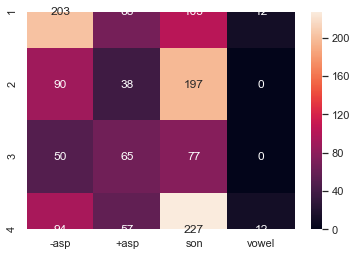

In [246]:
import seaborn as sns; sns.set()

sns.heatmap(df_tones_onsets, annot=True, fmt="d")

In [250]:
df_wlc_tones = pd.read_csv(os.path.join('..\..\data', 'wlc_cd_stressed.csv'),  delimiter='\t')

In [251]:
df_wlc_tones.head()

,word,pinyin_final,origin,lang,problematic,rus_transcription,stressed_syl,tone
0,阿尔申,āěrshén,аршин,NaN,NaN,аршЫн,shén,2
1,阿尔西非(合金),āěrxǐfēi,альсифер,NaN,NaN,Ал’с’ьф’ьр,ā,1
2,阿法林,āfǎlín,афалина,NaN,NaN,афал’Инъ,lín,2
3,阿留米特,āliúmǐtè,алюмит,NaN,?,ал’ум’Ит,mǐ,3
4,阿依尔,āyi'ěr,аил,NaN,NaN,аИл,yi,1


In [258]:
subset_by_tone(3, df_wlc_tones)['stressed_syl'].value_counts()

wǎ        8
lǐ        8
tǎ        7
kǎ        6
yǎ        4
mǎ        4
mǐ        4
bǐ        3
huǒ       3
lǔ        2
suǒ       2
kǎn       2
pǔ        2
mǎ_liè    1
zǔ        1
hǎi       1
qiǔ       1
kǒng      1
kǎo       1
fǎ        1
běn       1
běi       1
lěng      1
pǐn       1
dǎ        1
měng      1
chǔ       1
gǔ        1
Name: stressed_syl, dtype: int64

In [271]:
tones = [1, 2, 3, 4]
for tone in tones:
    t = str(tone)
    subset = df_wlc_tones[df_wlc_tones['tone'].str.contains(t)]
    print(f'tone #{t}: {subset.shape[0]} items')

tone #1: 84 items
tone #2: 103 items
tone #3: 70 items
tone #4: 80 items


In [267]:
tones_and_onsets_wlc = {}
for tone in tones:
    values = []
    for kind in [neg_asp, pos_asp, son, vowels]:
        n = group_by_initial(tone, kind, df_wlc_tones).shape[0]
        values.append(n)
    tones_and_onsets_wlc[str(tone)] = values

In [268]:
df_tones_onsets_wlc = pd.DataFrame.from_dict(tones_and_onsets_wlc, orient='index', columns = ['-asp','+asp','son','vowel'])

In [269]:
df_tones_onsets_wlc

,-asp,+asp,son,vowel
1,48,18,14,3
2,31,12,58,0
3,15,22,33,0
4,23,13,42,2


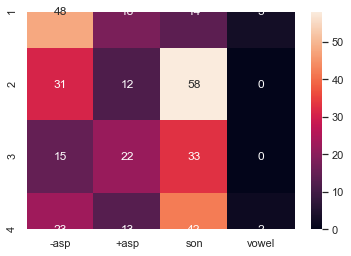

In [270]:
import seaborn as sns; sns.set()

sns.heatmap(df_tones_onsets_wlc, annot=True, fmt="d")

## Comparing tone at all

In [418]:
df_bkrs.head()

,label_zh,label_ru,translit
0,奥涅加,онега,àonièjiā
1,奥特拉德诺耶,отрадное,àotèlādénuòyē
2,贝加尔,байкал,bèijiāěr
3,拉多加,ладога,lāduōjiā
4,伏尔加,волга,fúěrjiā


In [423]:
def subset_tones(initial, final, char, df, col_phon, col_char):
    string = initial + final
    subset = df[df[col_phon].str.contains(string)]
    if char != '':
        subset = subset[subset[col_char].str.contains(char)]
        
    return subset

In [431]:
subset_tones('t', 'ǎ', '塔', df_bkrs, 'translit', 'label_zh').shape

(39, 3)

In [ ]:
#'ǎ'   '[āáà]'
#ta3: 39， ta124: 10
#ma3: 48, ma124: 15